In [ ]:
# VADER Sentiment
# TextBlob (Simplified Text Processing- NLTK based)

import textblob
!pip install vaderSentiment
!pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
# News Data (http://www.kaggle.com/aaron7sun/stocknews)

from google.colab import files
myfile = files.upload()

Saving Combined_News_DJIA.csv to Combined_News_DJIA (1).csv


In [ ]:
df0 = pd.read_csv('Combined_News_DJIA.csv')

In [ ]:
import yfinance as yf
import math
import pandas_datareader as pdr
from datetime import datetime

In [ ]:
start = datetime(2008,8,8)
end = datetime(2016,7,1)

dji = yf.download('^DJI', start, end)
snp = yf.download('^GSPC', start, end)
snp.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-08-08,1266.290039,1297.849976,1262.109985,1296.319946,1296.319946,4966810000
2008-08-11,1294.420044,1313.150024,1291.410034,1305.319946,1305.319946,5067310000
2008-08-12,1304.790039,1304.790039,1285.640015,1289.589966,1289.589966,4711290000
2008-08-13,1288.640015,1294.030029,1274.859985,1285.829956,1285.829956,4787600000
2008-08-14,1282.109985,1300.109985,1276.839966,1292.930054,1292.930054,4064000000


In [ ]:
df0.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."


In [ ]:
df0.tail(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
1986,2016-06-29,1,Explosion At Airport In Istanbul,Yemeni former president: Terrorism is the offs...,UK must accept freedom of movement to access E...,Devastated: scientists too late to captive bre...,British Labor Party leader Jeremy Corbyn loses...,A Muslim Shop in the UK Was Just Firebombed Wh...,Mexican Authorities Sexually Torture Women in ...,UK shares and pound continue to recover,...,"Escape Tunnel, Dug by Hand, Is Found at Holoca...",The land under Beijing is sinking by as much a...,Car bomb and Anti-Islamic attack on Mosque in ...,Emaciated lions in Taiz Zoo are trapped in blo...,Rupert Murdoch describes Brexit as 'wonderful'...,More than 40 killed in Yemen suicide attacks,Google Found Disastrous Symantec and Norton Vu...,Extremist violence on the rise in Germany: Dom...,BBC News: Labour MPs pass Corbyn no-confidence...,Tiny New Zealand town with 'too many jobs' lau...
1987,2016-06-30,1,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,Boris Johnson says he will not run for Tory pa...,Six gay men in Ivory Coast were abused and for...,Switzerland denies citizenship to Muslim immig...,Palestinian terrorist stabs israeli teen girl ...,Puerto Rico will default on $1 billion of debt...,Republic of Ireland fans to be awarded medal f...,...,Googles free wifi at Indian railway stations i...,Mounting evidence suggests 'hobbits' were wipe...,The men who carried out Tuesday's terror attac...,Calls to suspend Saudi Arabia from UN Human Ri...,More Than 100 Nobel Laureates Call Out Greenpe...,British pedophile sentenced to 85 years in US ...,"US permitted 1,200 offshore fracks in Gulf of ...",We will be swimming in ridicule - French beach...,UEFA says no minutes of silence for Istanbul v...,Law Enforcement Sources: Gun Used in Paris Ter...
1988,2016-07-01,1,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,"The president of France says if Brexit won, so...",British Man Who Must Give Police 24 Hours' Not...,100+ Nobel laureates urge Greenpeace to stop o...,Brazil: Huge spike in number of police killing...,Austria's highest court annuls presidential el...,"Facebook wins privacy case, can track any Belg...",...,"The United States has placed Myanmar, Uzbekist...",S&amp;P revises European Union credit rating t...,India gets $1 billion loan from World Bank for...,U.S. sailors detained by Iran spoke too much u...,Mass fish kill in Vietnam solved as Taiwan ste...,Philippines president Rodrigo Duterte urges pe...,Spain arrests three Pakistanis accused of prom...,"Venezuela, where anger over food shortages is ...",A Hindu temple worker has been killed by three...,Ozone layer hole seems to be healing - US &amp...


In [ ]:
df0.index=pd.to_datetime(df0['Date'])
del df0['Date']
df0.head()

,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',"b""The commander of a Navy air reconnaissance s...",...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'S

In [ ]:
# Close Price

df1 = pd.DataFrame({
    'dj': dji['Close'],
    'sp': snp['Close']
}).dropna()

In [ ]:
# Merge (Inner Join)

df2 = pd.merge(df0, df1, how = 'inner', on='Date', left_index=True)

df2.tail()

,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,dj,sp
Date,,,,,,,,,,,,,,,,,,,,,
2016-06-24,0,David Cameron to Resign as PM After EU Referendum,BBC forecasts UK votes to Leave the European U...,Nicola Sturgeon says a second independence ref...,It's official. Britain votes to leave the Euro...,World's Largest Tibetan Buddhist Institute Ord...,Not a single place in Scotland voted to leave ...,Rich Getting Richer at the Expense of the Poor...,Spanish minister calls for Gibraltar to be ret...,British Pound drops nearly 5% in minutes follo...,...,Nigel Farage disowns Vote Leave '350m for the ...,Top EU leader: we want Britain out as soon as ...,Nigel Farage: 350 million pledge to fund the N...,Thousands of London banking job cuts to start ...,Google says there was a large spike in searche...,EU referendum; Gibraltar backs Remain with 94%...,"After Brexit, U.K. Residents Google 'What Is T...",A Turkish man has been found guilty of insulti...,17400.750000,2037.410034
2016-06-27,0,Barclays and RBS shares suspended from trading...,Pope says Church should ask forgiveness from g...,Poland 'shocked' by xenophobic abuse of Poles ...,"There will be no second referendum, cabinet ag...","Scotland welcome to join EU, Merkel ally says",Sterling dips below Friday's 31-year low amid ...,No negative news about South African President...,Surge in Hate Crimes in the U.K. Following U.K...,Weapons shipped into Jordan by the CIA and Sau...,...,Richard Branson is calling on the UK governmen...,Turkey 'sorry for downing Russian jet',Edward Snowden lawyer vows new push for pardon...,Brexit opinion poll reveals majority don't wan...,"Conservative MP Leave Campaigner: ""The leave c...","Economists predict UK recession, further weake...","New EU 'superstate plan by France, Germany: Cr...",Pakistani clerics declare transgender marriage...,17140.240234,2000.540039
2016-06-28,1,"2,500 Scientists To Australia: If You Want To ...","The personal details of 112,000 French police ...",S&amp;P cuts United Kingdom sovereign credit r...,Huge helium deposit found in Africa,CEO of the South African state broadcaster qui...,"Brexit cost investors $2 trillion, the worst o...",Hong Kong democracy activists call for return ...,Brexit: Iceland president says UK can join 'tr...,UK's Osborne: 'Absolutely' going to have to cu...,...,"Richard Branson, the founder of Virgin Group, ...","37,000-yr-old skull from Borneo reveals surpri...",Palestinians stone Western Wall worshipers; po...,Jean-Claude Juncker asks Farage: Why are you h...,"""Romanians for Remainians"" offering a new home...",Brexit: Gibraltar in talks with Scotland to st...,8 Suicide Bombers Strike Lebanon,Mexico's security forces routinely use 'sexual...,17409.720703,2036.089966
2016-06-29,1,Explosion At Airport In Istanbul,Yemeni former president: Terrorism is the offs...,UK must accept freedom of movement to access E...,Devastated: scientists too late to captive bre...,British Labor Party leader Jeremy Corbyn loses...,A Muslim Shop in the UK Was Just Firebombed Wh...,Mexican Authorities Sexually Torture Women in ...,UK shares and pound continue to recover,Iceland historian Johannesson wins presidentia...,...,Car bomb and Anti-Islamic attack on Mosque in ...,Emaciated lions in Taiz Zoo are trapped in blo...,Rupert Murdoch describes Brexit as 'wonderful'...,More than 40 killed in Yemen suicide attacks,Google Found Disastrous Symantec and Norton Vu...,Extremist violence on the rise in Germany: Dom...,BBC News: Labour MPs pass Corbyn no-confidence...,Tiny New Zealand town with 'too many jobs' lau...,17694.679688,2070.770020
2016-06-30,1,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,Boris Johnson says he will not run for Tory pa...,Six gay men in Ivory Coast were abused and for...,Switzerland denies citizenship to Muslim immig...,Palestinian terrorist stabs israeli teen girl ...,Puerto Rico will default on $1 bil

In [ ]:
# combine the top news headlines

headlines = []

for row in range(0, len(df2.index)):
  headlines.append(''.join( str(x) for x in df2.iloc[row, 1:26]))

In [ ]:
df2.iloc[1, 1:26]

Top1     b'Why wont America and Nato help us? If they w...
Top2           b'Bush puts foot down on Georgian conflict'
Top3     b"Jewish Georgian minister: Thanks to Israeli ...
Top4     b'Georgian army flees in disarray as Russians ...
Top5         b"Olympic opening ceremony fireworks 'faked'"
Top6     b'What were the Mossad with fraudulent New Zea...
Top7     b'Russia angered by Israeli military sale to G...
Top8     b'An American citizen living in S.Ossetia blam...
Top9     b'Welcome To World War IV! Now In High Definit...
Top10    b"Georgia's move, a mistake of monumental prop...
Top11    b'Russia presses deeper into Georgia; U.S. say...
Top12    b'Abhinav Bindra wins first ever Individual Ol...
Top13    b' U.S. ship heads for Arctic to define territ...
Top14    b'Drivers in a Jerusalem taxi station threaten...
Top15    b'The French Team is Stunned by Phelps and the...
Top16    b'Israel and the US behind the Georgian aggres...
Top17    b'"Do not believe TV, neither Russian nor Geor.

In [ ]:
headlines[0]

'b"Georgia \'downs two Russian warplanes\' as countries move to brink of war"b\'BREAKING: Musharraf to be impeached.\'b\'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)\'b\'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire\'b"Afghan children raped with \'impunity,\' U.N. official says - this is sick, a three year old was raped and they do nothing"b\'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.\'b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO\'s side"b"The \'enemy combatent\' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it."b\'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]\'b\'Did the U.S. Prep Georgia for War with Russia?\'b\'Rice G

In [ ]:
# Clean the data (remove b, \)

clean_headlines=[]

for i in range(0, len(headlines)):
  clean_headlines.append(re.sub("b[(')]", '', headlines[i]))
  clean_headlines[i]= re.sub('b[(")]', '', clean_headlines[i])
  clean_headlines[i]= re.sub("\'", '', clean_headlines[i])

In [ ]:
clean_headlines[0]

'Georgia downs two Russian warplanes as countries move to brink of war"BREAKING: Musharraf to be impeached.Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fireAfghan children raped with impunity, U.N. official says - this is sick, a three year old was raped and they do nothing"150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SOs side"The enemy combatent trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it."Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]Did the U.S. Prep Georgia for War with Russia?Rice Gives Green Light for Israel to Attack Iran: Says U.S. h

In [ ]:
# Add the clean headlines to the merger data set - Show the new column

df2['Combined_News'] = clean_headlines

df2['Combined_News'][0]

'Georgia downs two Russian warplanes as countries move to brink of war"BREAKING: Musharraf to be impeached.Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fireAfghan children raped with impunity, U.N. official says - this is sick, a three year old was raped and they do nothing"150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SOs side"The enemy combatent trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it."Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]Did the U.S. Prep Georgia for War with Russia?Rice Gives Green Light for Israel to Attack Iran: Says U.S. h

In [ ]:
df2.head(2)

,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top19,Top20,Top21,Top22,Top23,Top24,Top25,dj,sp,Combined_News
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,...,b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11734.320312,1296.319946,Georgia downs two Russian warplanes as countri...
2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11782.349609,1305.319946,Why wont America and Nato help us? If they won...


# Preprocessing

In [ ]:
# Create a function to get the subjectivity (polarity)

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity  

In [ ]:
# Create 2 new columns Subjectivity and Polarity

df2['Subjectivity'] =df2['Combined_News'].apply(getSubjectivity)
df2['Polarity'] =df2['Combined_News'].apply(getPolarity)

In [ ]:
df2.tail(2)

,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top21,Top22,Top23,Top24,Top25,dj,sp,Combined_News,Subjectivity,Polarity
Date,,,,,,,,,,,,,,,,,,,,,
2016-06-29,1,Explosion At Airport In Istanbul,Yemeni former president: Terrorism is the offs...,UK must accept freedom of movement to access E...,Devastated: scientists too late to captive bre...,British Labor Party leader Jeremy Corbyn loses...,A Muslim Shop in the UK Was Just Firebombed Wh...,Mexican Authorities Sexually Torture Women in ...,UK shares and pound continue to recover,Iceland historian Johannesson wins presidentia...,...,More than 40 killed in Yemen suicide attacks,Google Found Disastrous Symantec and Norton Vu...,Extremist violence on the rise in Germany: Dom...,BBC News: Labour MPs pass Corbyn no-confidence...,Tiny New Zealand town with 'too many jobs' lau...,17694.679688,2070.770020,Explosion At Airport In IstanbulYemeni former ...,0.406462,0.046901
2016-06-30,1,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,Boris Johnson says he will not run for Tory pa...,Six gay men in Ivory Coast were abused and for...,Switzerland denies citizenship to Muslim immig...,Palestinian terrorist stabs israeli teen girl ...,Puerto Rico will default on $1 billion of debt...,Republic of Ireland fans to be awarded medal f...,Afghan suicide bomber 'kills up to 40' - BBC News,...,British pedophile sentenced to 85 years in US ...,"US permitted 1,200 offshore fracks in Gulf of ...",We will be swimming in ridicule - French beach...,UEFA says no minutes of silence for Istanbul v...,Law Enforcement Sources: Gun Used in Paris Ter...,17929.990234,2098.860107,Jamaica proposes marijuana dispensers for tour...,0.392035,-0.005811


In [ ]:
# Create a function to get the sentiment scores

def getSIA(text):
  sia = SentimentIntensityAnalyzer()
  sentiment = sia.polarity_scores(text)
  return sentiment

In [ ]:
# Get the sentiment scores for each day

compound = []
neg = []
neu = []
pos = []
SIA = 0

for i in range(0, len(df2['Combined_News'])):
  SIA = getSIA(df2['Combined_News'][i])
  compound.append(SIA['compound'])
  neg.append(SIA['neg'])
  neu.append(SIA['neu'])
  pos.append(SIA['pos'])


In [ ]:
# Store the sentiment scores in the merge dataset df2

df2['Compound'] = compound
df2['Negative'] = neg
df2['Neutral'] = neu
df2['Positive'] = pos


In [ ]:
df2.head(2)

,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top25,dj,sp,Combined_News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,...,"b""No Help for Mexico's Kidnapping Surge""",11734.320312,1296.319946,Georgia downs two Russian warplanes as countri...,0.277104,-0.050303,-0.9971,0.215,0.733,0.052
2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,...,"b""So this is what it's come to: trading sex fo...",11782.349609,1305.319946,Why wont America and Nato help us? If they won...,0.365960,0.082481,-0.9649,0.152,0.768,0.080


In [ ]:
keep_columns = ['dj', 'sp', 'Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive', 'Label']
df3 = df2[keep_columns]
df3

,dj,sp,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,Label
Date,,,,,,,,,
2008-08-08,11734.320312,1296.319946,0.277104,-0.050303,-0.9971,0.215,0.733,0.052,0
2008-08-11,11782.349609,1305.319946,0.365960,0.082481,-0.9649,0.152,0.768,0.080,1
2008-08-12,11642.469727,1289.589966,0.536257,-0.058650,-0.9658,0.130,0.811,0.059,0
2008-08-13,11532.959961,1285.829956,0.353922,-0.004739,-0.9805,0.143,0.800,0.057,0
2008-08-14,11615.929688,1292.930054,0.384127,0.026930,-0.9779,0.168,0.736,0.096,1
...,...,...,...,...,...,...,...,...,...
2016-06-24,17400.750000,2037.410034,0.363095,0.010873,-0.9133,0.086,0.874,0.039,0
2016-06-27,17140.240234,2000.540039,0.341564,-0.030999,-0.9730,0.154,0.758,0.088,0
2016-06-28,17409.720703,2036.089966,0.348121,0.039423,-0.9524,0.133,0.764,0.103,1


Statistic

In [ ]:
S = df3[['Label', 'Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive']]

df=S
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

             Label  Subjectivity     Polarity     Compound     Negative  \
count  1988.000000   1988.000000  1988.000000  1988.000000  1988.000000   
mean      0.535211      0.368190     0.024174    -0.944091     0.153071   
std       0.498884      0.063348     0.057846     0.233008     0.037403   
min       0.000000      0.160665    -0.254221    -0.999400     0.056000   
25%       0.000000      0.326310    -0.010928    -0.995500     0.126000   
50%       1.000000      0.366774     0.024289    -0.990900     0.151000   
75%       1.000000      0.408464     0.062030    -0.979400     0.178000   
max       1.000000      0.625000     0.222406     0.991900     0.292000   
var       0.248885      0.004013     0.003346     0.054293     0.001399   
skew     -0.141302      0.167565    -0.176832     6.662654     0.370358   
kurt     -1.982029      0.344148     0.795844    45.553310     0.123540   

           Neutral     Positive  
count  1988.000000  1988.000000  
mean      0.783000     0.063944

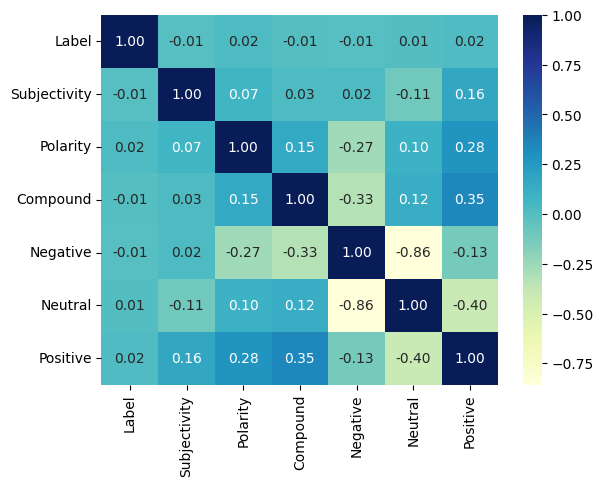

In [ ]:
# Heatmap (Negative - Neutral)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(S.corr(), annot=True, cmap="YlGnBu", fmt=".2f", annot_kws={'size':10})
plt.show()

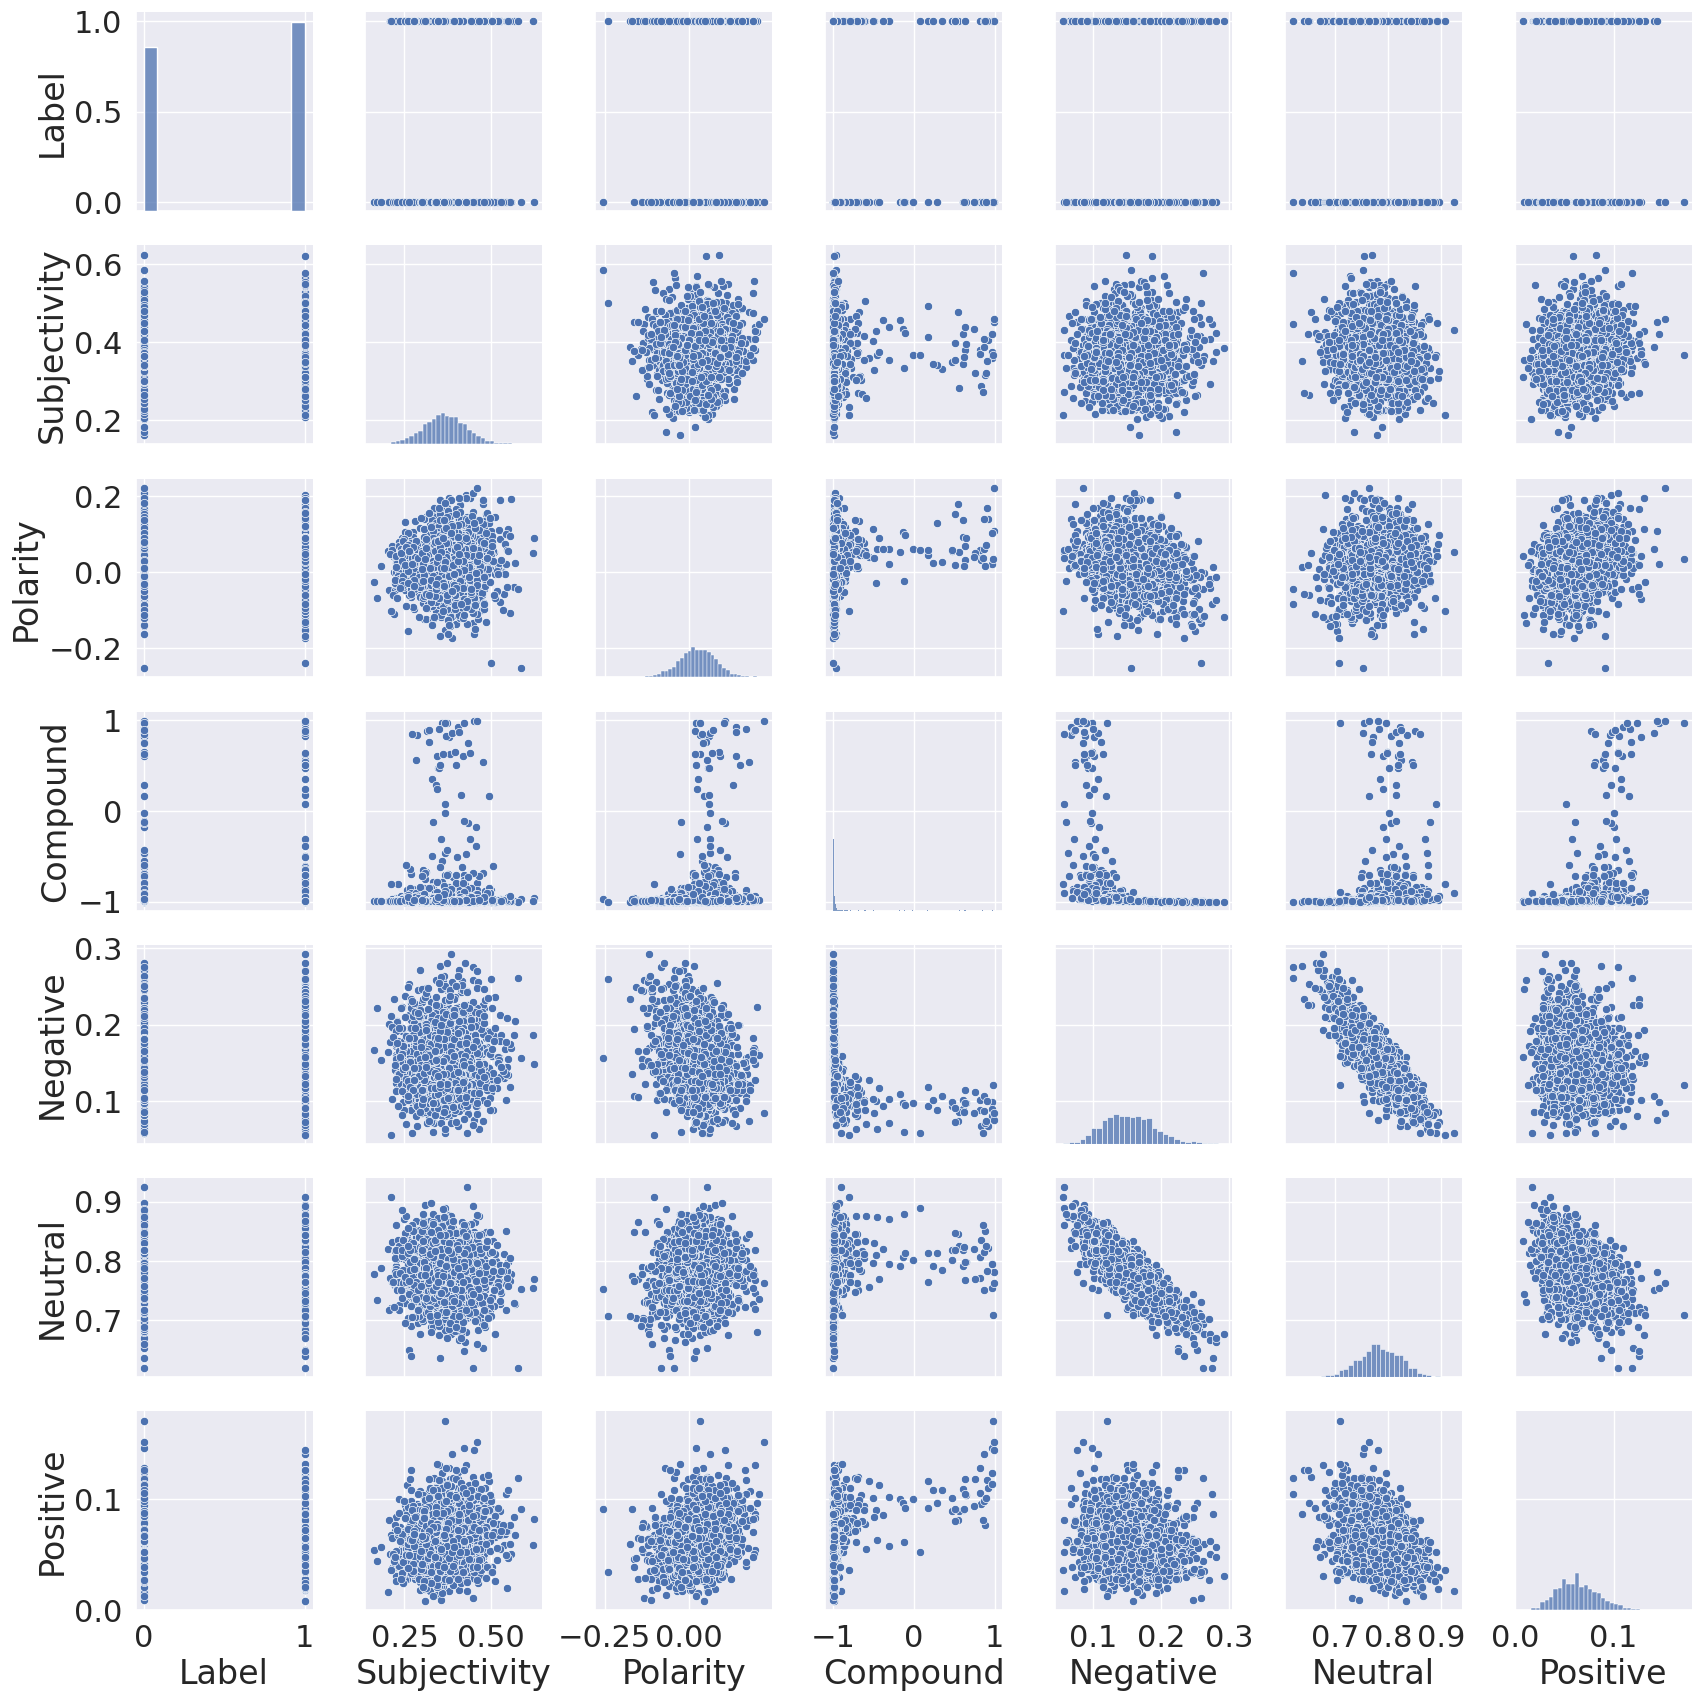

In [ ]:
# Pairplot (Compound)

sns.set(font_scale=2)
sns.pairplot(S)

Target & Feature Selection

In [ ]:
# (X) Feature Dataset  (Y) Target Dataset

x = df3
x = np.array(df3[['Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive']])

y = np.array(df3['Label'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=0)

LDA (Linear Discriminant Analysis)

In [ ]:
model = LinearDiscriminantAnalysis().fit(x_train, y_train)

In [ ]:
predictions = model.predict(x_test)
predictions

In [ ]:
y_test

In [ ]:
# Accuracy, Precision, Recall, F1-score

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.50      0.05      0.09       192
           1       0.52      0.96      0.67       206

    accuracy                           0.52       398
   macro avg       0.51      0.50      0.38       398
weighted avg       0.51      0.52      0.39       398



In [ ]:
x_df = df3.drop(['Label', 'dj', 'sp'], 1)
y_df =df3['Label']

df_result_list = pd.DataFrame(index=range(0), columns=['Model', 'Accuracy score', 'Precision score', 'Recall score', 'f1_score'])

start_date='2013'
end_date='2016'


<ipython-input-84-4d9e6e48db46>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_df = df3.drop(['Label', 'dj', 'sp'], 1)


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import *


def model_evaluation(model, model_name, df):
  actual = np.array(model.df_result['Actual'], dtype= np.int)
  predicted = np.array(model.df_result['Predicted'], dtype= np.int)
  print(classification_report(actual, predicted))

  print('accuracy_score:', accuracy_score(actual, predicted))
  print('precision_score:', precision_score(actual, predicted))
  print('recall_score:', recall_score(actual, predicted))
  print('f1_score:', f1_score(actual, predicted))

  matrix = confusion_matrix(actual, predicted)

  plt.subplots(figsize=(10, 5))
  sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False)
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.title('Confusion Matrix');

  new_data = {'Model': model_name,
              'Accuracy socre': accuracy_score(actual, predicted),
              'Precision socre': precision_score(actual, predicted),
              'Recall socre': recall_score(actual, predicted),
              'f1_socre': f1_score(actual, predicted)
              }
  df = df.append(new_data, ignore_index=True)

  return df            

# 1. Logistic Regrssion

In [ ]:
from sklearn.linear_model import LinearRegression

class LinearRegressionModel(object):
  def __init__(self):
    self.df_result = pd.DataFrame(columns=['Actual', 'Predicted'])

  def get_model(self):
    return LinearRegression(fit_intercept=False)

  def learn(self, df, ys, start_date, end_date, lookback_period=20):
    model = self.get_model()

    for date in df[start_date:end_date].index:
      x = self.get_prices_since(df, date, lookback_period)
      y = self.get_prices_since(ys, date, lookback_period)
      model.fit(x, y.ravel())

      x_current = df.loc[date].values
      [y_pred] = model.predict([x_current])

      new_index = pd.to_datetime(date, format='%Y-%m-%d')
      y_actual = ys.loc[date]
      self.df_result.loc[new_index] = [y_actual,  y_pred]

  def get_prices_since(self, df, date_since, lookback):
    index = df.index.get_loc(date_since)
    return df.iloc[index-lookback: index]

In [ ]:
from sklearn.linear_model import LogisticRegression
class LogisticRegressionModel(LinearRegressionModel):
  def get_model(self):
    return LogisticRegression(solver='lbfgs')

In [ ]:
logistic_reg_model = LogisticRegressionModel()
logistic_reg_model.learn(X_df, y_df, start_date, 
                         end_date, lookback_period=420)
logistic_reg_model.df_result.tail()

<ipython-input-101-e6d18c79f7f1>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  actual = np.array(model.df_result['Actual'], dtype= np.int)
<ipython-input-101-e6d18c79f7f1>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Dep

              precision    recall  f1-score   support

           0       0.32      0.02      0.05       405
           1       0.54      0.96      0.69       476

    accuracy                           0.53       881
   macro avg       0.43      0.49      0.37       881
weighted avg       0.44      0.53      0.39       881

accuracy_score: 0.5278093076049943
precision_score: 0.5352941176470588
recall_score: 0.9558823529411765
f1_score: 0.6862745098039216


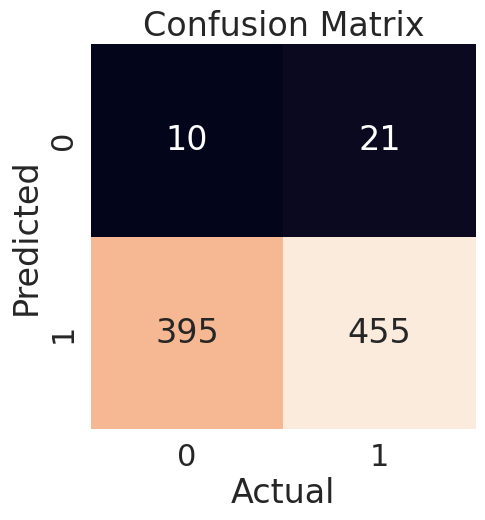

In [ ]:
df_result_list = model_evaluation(logistic_reg_model, "Logistic regression", df_result_list)

# 2. SVM

In [ ]:
from sklearn.svm import SVC

class SVCModel(LogisticRegressionModel):
    def get_model(self):
        return SVC(C=1000, gamma='auto')

In [ ]:
svc_model = SVCModel()
svc_model.learn(x_df, y_df, start_date, end_date, lookback_period=420)

<ipython-input-101-e6d18c79f7f1>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  actual = np.array(model.df_result['Actual'], dtype= np.int)
<ipython-input-101-e6d18c79f7f1>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Dep

              precision    recall  f1-score   support

           0       0.32      0.04      0.07       405
           1       0.53      0.93      0.68       476

    accuracy                           0.52       881
   macro avg       0.43      0.48      0.37       881
weighted avg       0.43      0.52      0.40       881

accuracy_score: 0.5198637911464246
precision_score: 0.5318892900120337
recall_score: 0.9285714285714286
f1_score: 0.6763580719204284


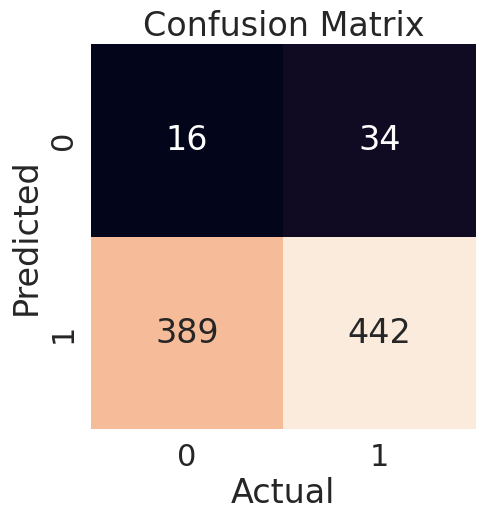

In [ ]:
df_result_list = model_evaluation(svc_model, "Support Vector Classifier", df_result_list)

# 3. SGD (Stochastic Gradient Descent)

In [ ]:
from sklearn.linear_model import SGDClassifier
 
class SGDModel(SVCModel):        
    def get_model(self):            
        return SGDClassifier( ) 

In [ ]:
sgd_model = SGDModel()    
sgd_model.learn(x_df, y_df, start_date, end_date, lookback_period=420) 

<ipython-input-101-e6d18c79f7f1>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  actual = np.array(model.df_result['Actual'], dtype= np.int)
<ipython-input-101-e6d18c79f7f1>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Dep

              precision    recall  f1-score   support

           0       0.45      0.43      0.44       405
           1       0.54      0.56      0.55       476

    accuracy                           0.50       881
   macro avg       0.49      0.49      0.49       881
weighted avg       0.50      0.50      0.50       881

accuracy_score: 0.49943246311010214
precision_score: 0.5350701402805611
recall_score: 0.5609243697478992
f1_score: 0.5476923076923077


<ipython-input-101-e6d18c79f7f1>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_data, ignore_index=True)


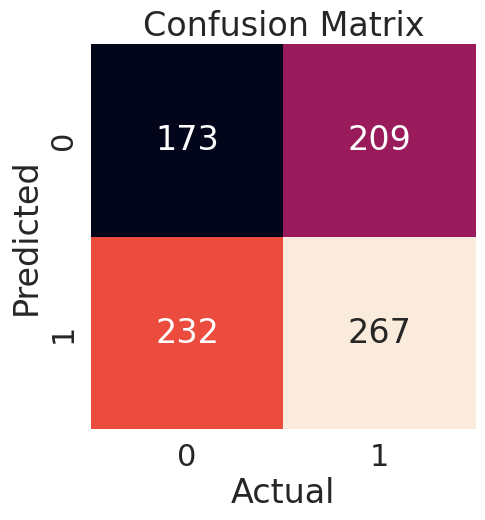

In [ ]:
df_result_list = model_evaluation(sgd_model, "Stochastic Gradient Descent", df_result_list)

# 4. LDA (Linear Discriminant Analysis)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

class LDAModel(SVCModel):
  def get_model(self):
    return LinearDiscriminantAnalysis()

In [ ]:
lda_model = LDAModel()
lda_model.learn(x_df, y_df, start_date, end_date, lookback_period=420)

<ipython-input-101-e6d18c79f7f1>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  actual = np.array(model.df_result['Actual'], dtype= np.int)
<ipython-input-101-e6d18c79f7f1>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Dep

              precision    recall  f1-score   support

           0       0.46      0.20      0.28       405
           1       0.54      0.79      0.64       476

    accuracy                           0.52       881
   macro avg       0.50      0.50      0.46       881
weighted avg       0.50      0.52      0.48       881

accuracy_score: 0.5232690124858116
precision_score: 0.54
recall_score: 0.7941176470588235
f1_score: 0.6428571428571429


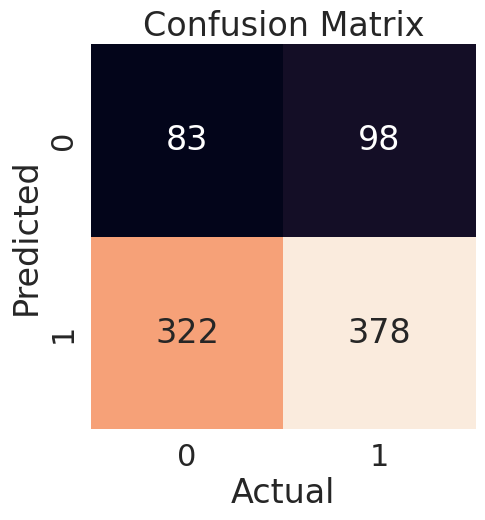

In [ ]:
df_result_list = model_evaluation(lda_model, "Linear Discriminant Analysis", df_result_list)

# 5. QDA (Quadratic Discriminant Analysis)

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

class QDAModel(SVCModel):
  def get_model(self):
    return QuadraticDiscriminantAnalysis()

In [ ]:
qda_model = QDAModel()
qda_model.learn(x_df, y_df, start_date, end_date, lookback_period=420)

<ipython-input-101-e6d18c79f7f1>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  actual = np.array(model.df_result['Actual'], dtype= np.int)
<ipython-input-101-e6d18c79f7f1>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Dep

              precision    recall  f1-score   support

           0       0.42      0.25      0.31       405
           1       0.53      0.70      0.60       476

    accuracy                           0.50       881
   macro avg       0.47      0.48      0.46       881
weighted avg       0.48      0.50      0.47       881

accuracy_score: 0.4960272417707151
precision_score: 0.5250783699059561
recall_score: 0.7037815126050421
f1_score: 0.6014362657091562


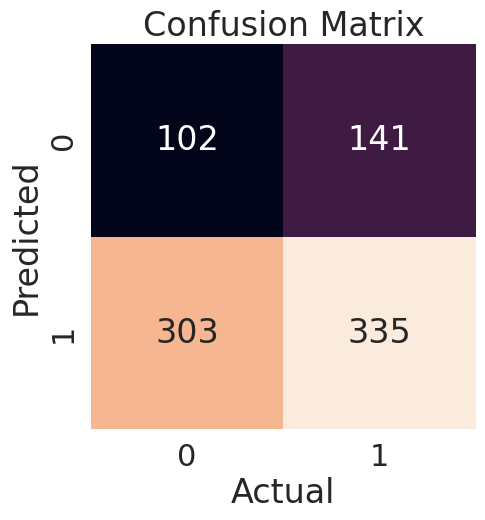

In [ ]:
df_result_list = model_evaluation(qda_model, "Quadratic Discriminant Analysis", df_result_list)

# 6. KNN classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

class KNNModel(SVCModel):
  def get_model(self):
    return KNeighborsClassifier()

In [ ]:
knn_model = KNNModel()
knn_model.learn(x_df, y_df, start_date, end_date, lookback_period=420)

<ipython-input-101-e6d18c79f7f1>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  actual = np.array(model.df_result['Actual'], dtype= np.int)
<ipython-input-101-e6d18c79f7f1>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Dep

              precision    recall  f1-score   support

           0       0.48      0.47      0.47       405
           1       0.56      0.57      0.56       476

    accuracy                           0.52       881
   macro avg       0.52      0.52      0.52       881
weighted avg       0.52      0.52      0.52       881

accuracy_score: 0.5209988649262202
precision_score: 0.5555555555555556
recall_score: 0.5672268907563025
f1_score: 0.5613305613305614


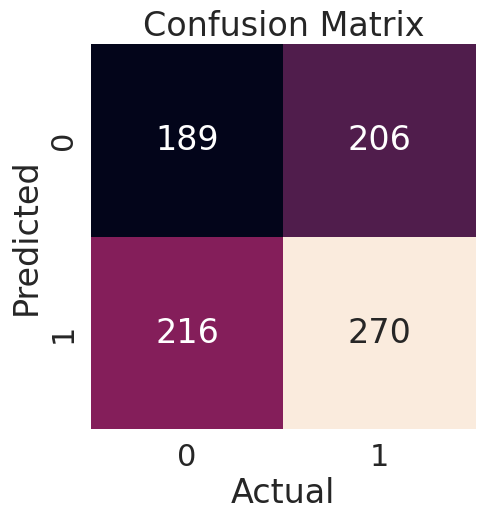

In [ ]:
df_result_list = model_evaluation(knn_model, "KNN classifier", df_result_list)

In [ ]:
df_result_list = df_result_list.set_index('Model')

In [ ]:
df_result_list['f1_score'].max()

nan

In [ ]:
def get_model_performance(model, model_name, df):
    actual = np.array(model.df_result['Actual'], dtype=np.int)
    predicted = np.array(model.df_result['Predicted'], dtype=np.int)

    new_data = {'Model' : model_name, 
                'Accuracy score' : accuracy_score(actual, predicted), 
                'Precision score' : precision_score(actual, predicted), 
                'Recall score' : recall_score(actual, predicted), 
                'f1_score' : f1_score(actual, predicted)
                }
    df = df.append(new_data, ignore_index=True)

    return df

In [ ]:
def compare_by_lookback(model, X_df, y_df, 
                        start_date, end_date):
    df_lda_result_per_lookback = pd.DataFrame(index=range(0), columns=['Model', 'Accuracy score', 'Precision score', 'Recall score', 'f1_score'])

    for i in range(101):
        lookback_period = i*10 + 20
        name = str(i*10 + 10)
        model.learn(X_df, y_df, start_date, 
                                end_date, lookback_period)
        df_lda_result_per_lookback = get_model_performance(model, name, df_lda_result_per_lookback)

    df_lda_result_per_lookback = df_lda_result_per_lookback.set_index('Model')

    for i in df_lda_result_per_lookback:
        df_lda_result_per_lookback[i].plot()  
        plt.legend()
        plt.title(i)
        plt.xlabel("Lookback Period")
        plt.ylabel("")
        plt.show()